In [1]:
# import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [3]:
uber=pd.read_csv("Uber Request Data (1).csv")

In [4]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


## Data inspection

In [6]:
# to check rows and colums in dataset
uber.shape

(6745, 6)

In [9]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


## checking the data quality

In [14]:
uber.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [42]:
#replacing the space in column name to _
uber.columns=uber.columns.str.replace(' ','_')

In [24]:
#checking duplicates
uber.duplicated(subset=['Request_id','Driver_id']).sum()

0

In [25]:
uber['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [26]:
uber['Pickup_point'].unique()

array(['Airport', 'City'], dtype=object)

In [ ]:
uber['Pickup_point'].unique()

In [27]:
## Nulll values analysis
uber.isnull().sum()

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
Request_timestamp       0
Drop_timestamp       3914
dtype: int64

In [41]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [35]:
#uber.loc[uber['Status'] == 'Trip Completed']

Request_id           6745
Pickup_point         6745
Driver_id            4095
Status               6745
Request_timestamp    6745
Drop_timestamp       2831
dtype: int64

In [39]:
uber['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [43]:
uber['Request_Date_timestamp']=pd.to_datetime(uber['Request_timestamp'])

In [46]:
uber['Drop_Date_timestamp']=pd.to_datetime(uber['Drop_timestamp'])

In [49]:
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_Date_timestamp,Drop_Date_timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47


In [51]:
uber=uber.drop(['Request_timestamp','Drop_timestamp'],axis=1)

In [52]:
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_Date_timestamp,Drop_Date_timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [53]:
uber['Drop_Date']=uber['Drop_Date_timestamp'].dt.date

In [55]:
uber['Drop_time']=uber['Drop_Date_timestamp'].dt.time

In [57]:
uber['Request_Date']=uber['Request_Date_timestamp'].dt.date
uber['Request_times']=uber['Request_Date_timestamp'].dt.time

In [58]:
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_Date_timestamp,Drop_Date_timestamp,Drop_Date,Drop_time,Request_Date,Request_times
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,13:00:00,2016-11-07,11:51:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,18:47:00,2016-11-07,17:57:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:58:00,2016-12-07,09:17:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,22:03:00,2016-12-07,21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,09:25:47,2016-07-13,08:33:16


In [66]:
#uber=uber.drop(['Request_Date_timestamp','Drop_Date_timestamp'],axis=1)

In [67]:
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Drop_Date,Drop_time,Request_Date,Request_times
0,619,Airport,1.0,Trip Completed,2016-11-07,13:00:00,2016-11-07,11:51:00
1,867,Airport,1.0,Trip Completed,2016-11-07,18:47:00,2016-11-07,17:57:00
2,1807,City,1.0,Trip Completed,2016-12-07,09:58:00,2016-12-07,09:17:00
3,2532,Airport,1.0,Trip Completed,2016-12-07,22:03:00,2016-12-07,21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13,09:25:47,2016-07-13,08:33:16


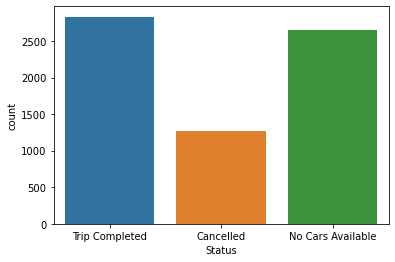

In [69]:
#plot the bar chart for status
ax=sns.countplot(x='Status',data=uber)
plt.show()

In [ ]:
#plot the bar chart for status
ax=sns.countplot(x='Pickup_point',data=uber)
plt.show()

In [85]:
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Drop_Date,Drop_time,Request_Date,Request_times
0,619,Airport,1.0,Trip Completed,2016-11-07,13:00:00,2016-11-07,11:51:00
1,867,Airport,1.0,Trip Completed,2016-11-07,18:47:00,2016-11-07,17:57:00
2,1807,City,1.0,Trip Completed,2016-12-07,09:58:00,2016-12-07,09:17:00
3,2532,Airport,1.0,Trip Completed,2016-12-07,22:03:00,2016-12-07,21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13,09:25:47,2016-07-13,08:33:16
